# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file)

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table.
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [4]:
# Your code here.

import pandas as pd


student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data


,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

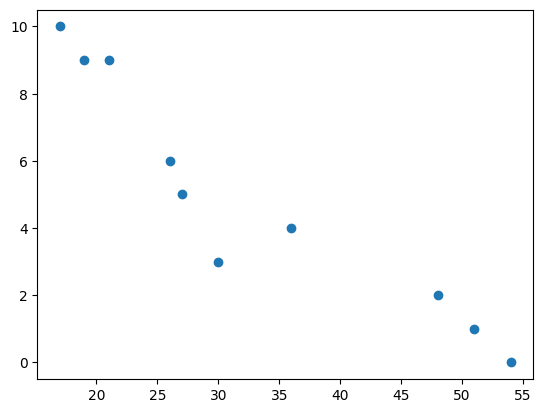

In [8]:
import numpy as np
from matplotlib import pyplot as plt

plt.scatter(student_data["Age"],student_data["Tardies"])


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
"""

We can indeed notice a trend fro the scatter plot. It seems like the hypothesis was correct: the younger the student, the more he is likely to be late.

"""


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [12]:
# Your response here.
#correlation:

from sklearn import linear_model

x = student_data[["Age"]]
y = student_data["Tardies"]

model = linear_model.LinearRegression()
result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

#covariance:

display(student_data.cov())

#Covariance reveals how two variables change together while correlation determines how closely two variables are related to each other.

12.888803363135771

array([-0.24282077])

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [15]:
regression_line = result.intercept_ + result.coef_[0]*x


#linear regression picks the line (i.e. the intercept and the gradient) that best "fits" our data.
#We are using a linear model and a linear regression.


Plot your regression model on your scatter plot.

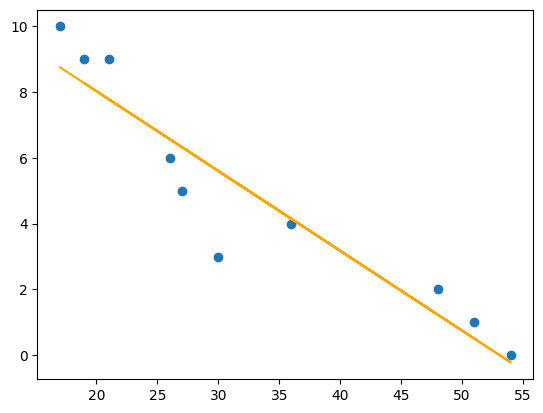

In [16]:
# Your code here.

plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [17]:
# Under this model, we can say that there is a correlation between the age of the student and the number of times he will be late.
# For example, at 20 years old, we can expect him to be late 8 times while we can expect him to be late only 1 time at 50 years old.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables.

In [19]:
# Import any libraries you may need & the data

from sklearn import linear_model


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

vehicles = pd.read_csv("vehicles.csv")
vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable.

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [68]:
# Your response here.

X = vehicles[["Year","Cylinders","Fuel Barrels/Year","Combined MPG","Fuel Cost/Year"]]
y = pd.DataFrame(data=vehicles,columns=["CO2 Emission Grams/Mile"])


from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X)
scaled_x = pd.DataFrame(transformer.transform(X),columns = X.columns)

scaled_x


,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
0,-1.657526,-1.005601,0.398406,-0.572991,0.113229
1,-1.657526,0.133841,1.733866,-1.355412,1.296774
2,-1.558371,-1.005601,0.669671,-0.768596,0.409115
3,-1.558371,0.133841,1.733866,-1.355412,1.296774
4,-1.360059,0.133841,0.669671,-0.768596,1.296774
...,...,...,...,...,...
35947,1.217989,-1.575323,-1.892278,3.143509,-1.563460
35948,1.317145,-1.575323,-1.892278,3.143509,-1.563460
35949,1.416300,-1.575323,-1.892278,3.143509,-1.563460
35950,1.515456,-1.575323,-1.892278,3.143509,-1.563460


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [71]:
# Your response here.

model = linear_model.LogisticRegression(random_state=0)
result = model.fit(scaled_x, vehicles["CO2 Emission Grams/Mile"])

#We get an error when using a logistic regression.


ValueError: ignored

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

0.9808734920269122

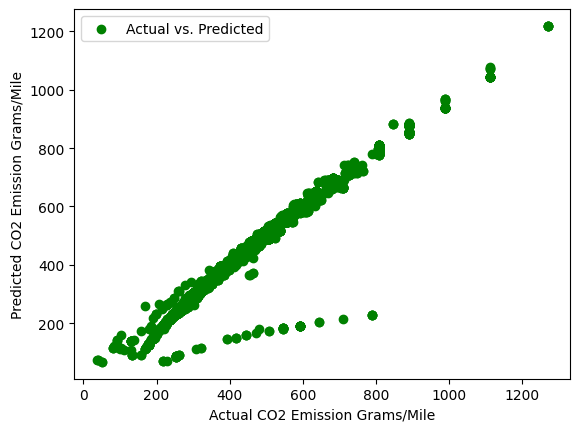

In [74]:
x = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y = vehicles["CO2 Emission Grams/Mile"]

#Using a linear regression model:

model = linear_model.LinearRegression()
result = model.fit(x, y)

display(result.score(x, y))

predicted_y = model.predict(x)

plt.scatter(y, predicted_y, c='g', label="Actual vs. Predicted")


plt.xlabel("Actual CO2 Emission Grams/Mile")
plt.ylabel("Predicted CO2 Emission Grams/Mile")
plt.legend()

plt.show()


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression.
First, build a dataframe with the data.

In [44]:
# Your code here.

parties = pd.DataFrame({'People_invited':[1,3,4,6,8,9,11,14], 'People_attending': [1,2,4,4,5,7,8,13]})
parties

,People_invited,People_attending
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

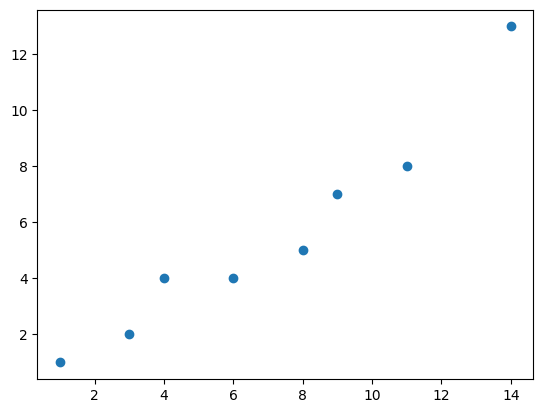

In [45]:
# Your code here.

x = parties[["People_invited"]]
y = parties["People_attending"]

plt.scatter(x,y)
plt.show()

In [46]:
model = linear_model.LinearRegression()

result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

-0.43939393939393945

array([0.84848485])

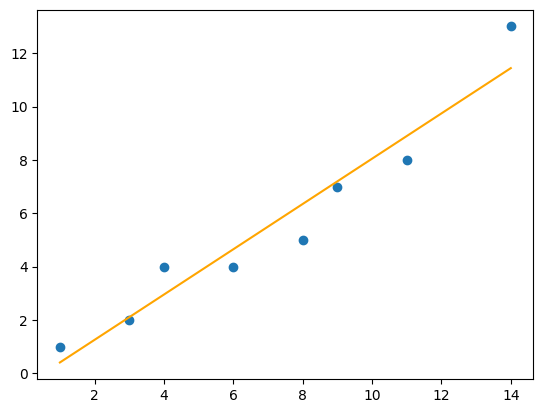

In [47]:
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here.

"""

We can see that we have a high coef of 0.85. When more people are invited, more people are attending.

"""


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model.

In [48]:
# Your response here.

"""

We can see that the last point is an outlier (x = 8, y = 5)

"""

'\n\nWe can see that the last point is an outlier (x = 14, y = 13)\n\n'

In [57]:
parties_2 = pd.DataFrame({'People_invited':[1,3,4,6,8,9,11], 'People_attending': [1,2,4,4,5,7,8]})
parties_2

,People_invited,People_attending
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


In [58]:
x = parties_2[["People_invited"]]
y = parties_2["People_attending"]

model = linear_model.LinearRegression()

result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

0.32330827067669254

array([0.68421053])

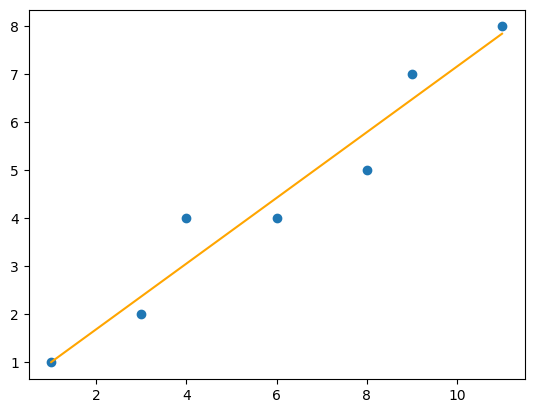

In [59]:
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
"""
We can see that the coef is lower (from 0.85 to 0.68).

We can also see that the correlation remains but that the regression line moved down slightly.

"""
